In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

In [16]:
weather = pd.read_csv('data/weather.csv', encoding='euc-kr')
weather.head()

,도시,월,평균기온,최저기온,최고기온
0,서울,Jan,-4.0,-7.3,0.1
1,서울,Feb,-1.6,-5.9,3.3
2,서울,Mar,8.1,3.8,13.6
3,서울,Apr,13.0,8.1,18.5
4,서울,May,18.2,13.4,23.3


In [17]:
weather.columns = ['City', 'Month', 'Avg. Temp', 'Min Temp', 'Max Temp']

In [18]:
# for sorting the data, let's change Jan, Feb, ... to 1, 2, ... !
# weather['Month'] = pd.to_datetime(weather['Month'], format='%b').dt.month
weather['Month'] = pd.to_datetime(weather['Month'], format='%b').dt.month
weather.head()

,City,Month,Avg. Temp,Min Temp,Max Temp
0,서울,1,-4.0,-7.3,0.1
1,서울,2,-1.6,-5.9,3.3
2,서울,3,8.1,3.8,13.6
3,서울,4,13.0,8.1,18.5
4,서울,5,18.2,13.4,23.3


In [19]:
# for your convenience with plotting, let's pivot the weather datasets!
weather_pivot = weather.pivot(index='Month', columns='City', values='Avg. Temp')
weather_pivot.head()

City,대구,서울,인천,철원
Month,,,,
1,-0.9,-4.0,-3.8,-7.3
2,1.3,-1.6,-1.8,-4.4
3,9.2,8.1,6.9,6.2
4,15.0,13.0,11.9,11.2
5,19.2,18.2,17.0,16.8


''

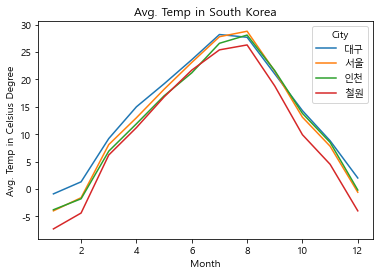

In [20]:
# WOW!!!!!!!!!!!!!
weather_pivot.plot()
plt.title('Avg. Temp in South Korea')
plt.xlabel('Month')
plt.ylabel('Avg. Temp in Celsius Degree')
;

''

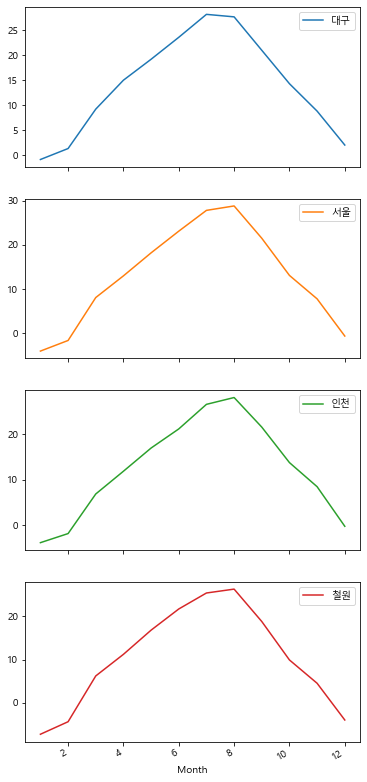

In [21]:
# When you wanna seperate each column from each other, then try this!
weather_pivot.plot(subplots=True, figsize=(6, 15)) #figsize(row size, col size)
;

### let's go on with other new datasets!

In [22]:
import seaborn as sns
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


''

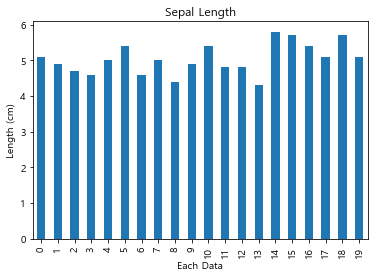

In [23]:
# iris.sepal_length[:20].plot.bar() # this is also possible, but below is preferrable and read-able!
iris['sepal_length'][:20].plot(kind='bar', rot=90)
plt.title('Sepal Length')
plt.xlabel('Each Data')
plt.ylabel('Length (cm)')
;

''

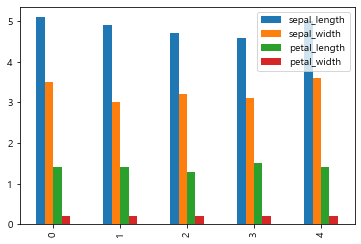

In [24]:
iris[:5].plot(kind='bar')
;

''

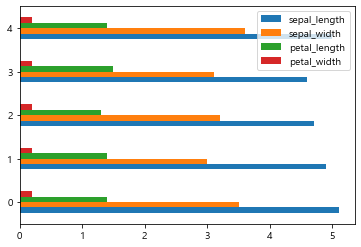

In [25]:
iris[:5].plot(kind='barh')
;

''

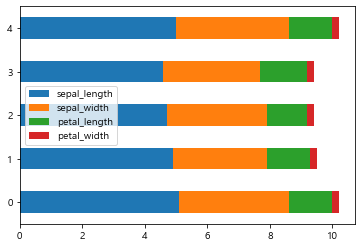

In [26]:
iris[:5].plot(kind='barh', stacked=True)
;

''

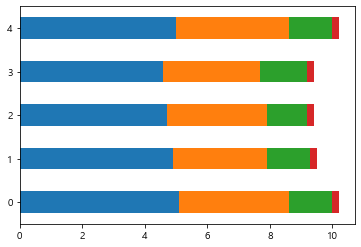

In [27]:
iris[:5].plot(kind='barh', stacked=True, legend=False)
;

In [28]:
iris_df = iris.groupby('species').mean()
iris_df

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


''

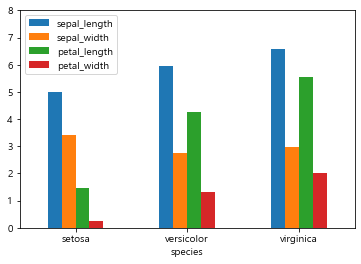

In [29]:
iris_df.plot(kind='bar', rot=0)
plt.ylim(0, 8)
;

''

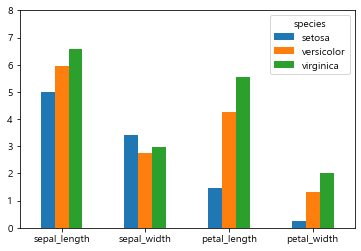

In [31]:
iris_df.T.plot(kind='bar', rot=0)
plt.ylim(0, 8)
;

### histogram

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


''

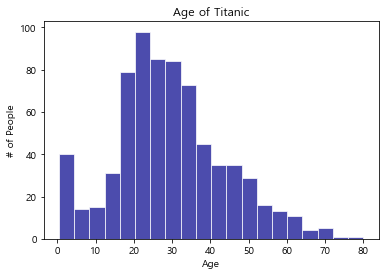

In [33]:
titanic['age'].plot(kind='hist', bins=20, alpha=0.7, edgecolor='white', color='darkblue')

plt.title('Age of Titanic')
plt.xlabel('Age')
plt.ylabel('# of People')
;

### Kernel Density Plot

''

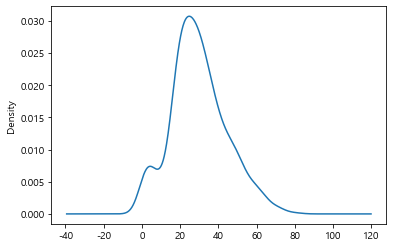

In [36]:
titanic['age'].plot(kind='kde')
# titanic['age'].plot(kind='density'): same!
;

''

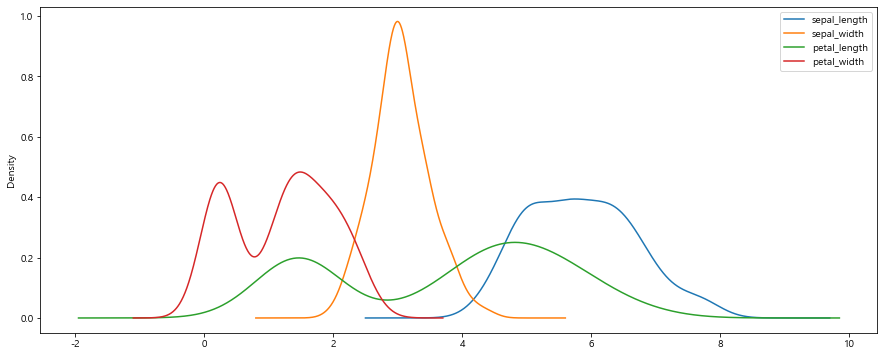

In [41]:
iris.plot(kind='kde', figsize=(15, 6))
;

### Box Plot

''

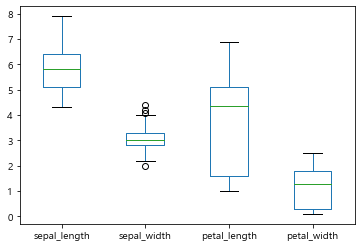

In [43]:
iris.plot(kind='box')
;

''

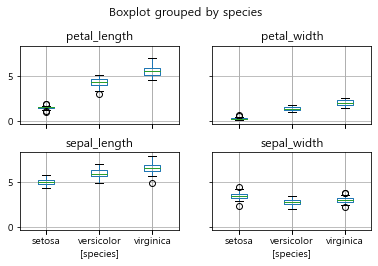

In [51]:
iris.boxplot(by='species')
plt.tight_layout(pad=3, h_pad=1)
;

### Scatter Plot

''

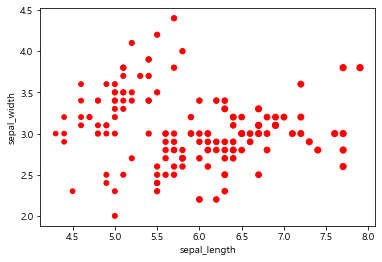

In [52]:
iris.plot(kind='scatter',
         x='sepal_length', y='sepal_width',
         s=iris['sepal_length']*5, c='red') # s means 'size' of each dot
;

'                   '

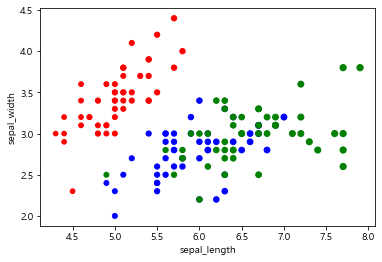

In [55]:
# When you wanna set the color differently on each dot, then try this!
color_arr = np.where(iris['species'] == 'setosa', 'red',
                     np.where(iris['species'] == 'versicolor', 'blue', 'green'))

iris.plot(kind='scatter', x='sepal_length', y='sepal_width',
         s=iris['sepal_length']*5,
         c=color_arr)                     
;                    